In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

colormap = mpl.cm.tab10.colors   # Qualitative colormap

In [3]:
# # Uncomment to use autoreload
# %load_ext autoreload
# %autoreload 2

# import os
# import os.path as osp
# import sys
# import torch
# import numpy as np
# from time import time
# from omegaconf import OmegaConf
# start = time()
# import warnings
# warnings.filterwarnings('ignore')

# # torch.cuda.set_device(I_GPU)
# DIR = os.path.dirname(os.getcwd())
# ROOT = os.path.join(DIR, "..")
# sys.path.insert(0, ROOT)
# sys.path.insert(0, DIR)

# from torch_points3d.utils.config import hydra_read
# from torch_geometric.data import Data
# from torch_points3d.core.multimodal.data import MMData, MMBatch
# from torch_points3d.visualization.multimodal_data import visualize_mm_data
# from torch_points3d.core.multimodal.image import SameSettingImageData, ImageData
# from torch_points3d.datasets.segmentation.multimodal.scannet import ScannetDatasetMM
# from torch_points3d.datasets.segmentation.scannet import CLASS_COLORS, CLASS_NAMES, CLASS_LABELS
# from torch_points3d.metrics.segmentation_tracker import SegmentationTracker

# from pykeops.torch import LazyTensor

In [4]:
# # Set your dataset root directory, where the data was/will be downloaded
# DATA_ROOT = '/project/fsun/dvata'

# dataset_config = 'segmentation/multimodal/Feng/scannet-neucon-smallres-m2f-partial-subsampled'   
# models_config = 'segmentation/multimodal/Feng/mvfusion'    # model family
# model_name = 'MVFusion_3D_small'                       # specific model

# overrides = [
#     'task=segmentation',
#     f'data={dataset_config}',
#     f'models={models_config}',
#     f'model_name={model_name}',
#     f'data.dataroot={DATA_ROOT}',
# ]

# cfg = hydra_read(overrides)
# OmegaConf.set_struct(cfg, False)  # This allows getattr and hasattr methods to function correctly
# cfg.data.load_m2f_masks = True   # load Mask2Former predicted masks

In [4]:
cfg.data.m2f_preds_dirname = 'm2f_masks'
cfg.data.n_views = cfg.models[model_name].backbone.transformer.n_views
print(cfg.data.n_views)

9


In [5]:
# Dataset instantiation
start = time()
dataset = ScannetDatasetMM(cfg.data)
# print(dataset)|
print(f"Time = {time() - start:0.1f} sec.")

Load predicted 2D semantic segmentation labels from directory  m2f_masks
initialize train dataset
initialize val dataset
initialize test dataset
line 720 scannet.py: split == 'test'
Time = 1.6 sec.


In [26]:
test_dataset = torch.load("/project/fsun/dvata/scannet-trainval-test/processed/test.pt")

test_sample = torch.load("/project/fsun/dvata/scannet-trainval-test/processed/raw_test/scene0708_00.pt")
print(test_sample)

Data(id_scan=[1], origin_id=[228398], pos=[228398, 3], rgb=[228398, 3])


In [30]:
torch.equal(test_sample.pos, test_dataset[0].pos[134360:134360+228398])


True

In [6]:
# # dataset.train_dataset[0]

# split='train'
# getattr(dataset.val_dataset, "MAPPING_IDX_TO_SCAN_{}_NAMES".format(split.upper()))

In [7]:
# Load datas that need to be collated together into train.pt

In [7]:
# metadata_path = osp.join('/project/fsun/dvata/scannet-trainval-test/raw', "metadata")
# split_files = ["scannetv2_{}.txt".format(s) for s in ['train']]
# scan_names = []
# for sf in split_files:
#     f = open(osp.join(metadata_path, sf))
#     scan_names.append(sorted([line.rstrip() for line in f]))
#     f.close()
    
# # scan_names = sorted(scan_names)

In [8]:
# scan_names

In [9]:
# source_3d_dir = '/project/fsun/dvata/scannet-trainval-test/processed/processed_3d_train'
# train_scans = scan_names[0][:3]
# datas = [torch.load(os.path.join(source_3d_dir, scene_id + '.pt')) for scene_id in train_scans]
# print(datas)

In [10]:
# out = dataset.train_dataset.collate(datas)
# out

In [11]:
# processed_3d_train = '/project/fsun/dvata/scannet-neucon-smallres-m2f/processed/processed_3d_train'
# processed_3d_val = '/project/fsun/dvata/scannet-neucon-smallres-m2f/processed/processed_3d_val'


# # for scene in os.listdir(processed_3d_train):
# #     print(scene)


In [12]:
# train_sample = torch.load(os.path.join(processed_3d_train, 'scene0000_00.pt'))
# val_sample = torch.load(os.path.join(processed_3d_val, 'scene0011_00.pt'))

In [13]:
# val_sample

In [14]:
# # val_dataset = torch.load('/project/fsun/dvata/scannet-neucon-smallres-m2f/processed/val.pt')
# # val_dataset
# del val_dataset

In [19]:
# import pickle

In [14]:
# p = "/project/fsun/data/scannet/axis_aligned_metas/fragments_test.pkl"

# with open(p, 'rb') as f:
#     test_metas = pickle.load(f)


In [15]:
# p = '/project/fsun/data/scannet/axis_aligned_metas_test/scene0716_00/fragments.pkl'

# with open(p, 'rb') as f:
#     temp = pickle.load(f)


In [20]:
# test_metas

In [7]:
# print(len(train_metas))
# print(len(val_metas))

19893
5415


In [16]:
# # trainval_metas = train_metas + val_metas
# len(trainval_metas)

25308

In [17]:
# # open a file, where you ant to store the data
# file = open("/project/fsun/data/scannet/axis_aligned_metas_trainval_test/fragments_train.pkl", 'wb')

# # dump information to that file
# pickle.dump(trainval_metas, file)

# # close the file
# file.close()


In [5]:
# from sklearn.metrics import multilabel_confusion_matrix
# import os
# from PIL import Image

In [6]:
# mask_dir = '/project/fsun/data/scannet/scans/scene0000_00/submission_masks_25k'
# gt_dir = '/project/fsun/data/scannet/scans/scene0000_00/label-filt-scannet20'

# prediction_names = []
# test_label_names = []
# for m in os.listdir(mask_dir):
#     prediction_names.append(os.path.join(mask_dir, m))

#     test_label_names.append(os.path.join(gt_dir, m))


In [ ]:
# class_names = [
# 		'undefined', # 0
# 		'wall', # 1
# 		'floor', # 2
# 		'cabinet', # 3
# 		'bed', # 4
# 		'chair', # 5
# 		'sofa', # 6
# 		'table', # 7
# 		'door', # 8
# 		'window',
# 		'bookshelf',
# 		'picture',
# 		'counter',
# 		'desk',
# 		'curtain', # 14
# 		'refrigerator', # 15
# 		'shower curtain',
# 		'toilet',
# 		'sink',
# 		'bathtub',
# 		'otherfurniture'
# 	]

# num_classes = 21
# class_iou = dict()
# for name in class_names:
#     class_iou[name] = list()

# class_idx = dict(zip(class_names, range(num_classes)))

# # begin evaluate
# assert len(test_label_names) == len(prediction_names)

# for i, (name1, name2) in enumerate(zip(test_label_names, prediction_names)):
#     print('\rRunning test image %d / %d' % (i + 1, len(test_label_names)))

#     label = np.array(Image.open(name1))
#     pred = np.array(Image.open(name2))

#     confusion_matrix = multilabel_confusion_matrix(label.flatten(), pred.flatten(), labels=list(class_idx.values()))
#     for eval_cls in class_names:
#         eval_idx = class_idx[eval_cls]
#         (tn, fp), (fn, tp) = confusion_matrix[eval_idx]

#         if tp + fn > 0:
#             class_iou[eval_cls].append(tp / (tp + fp + fn))

# print('\n****************************************')
# print('* The IoU of each class is as follows: *')
# print('****************************************')
# for eval_cls in class_names:
#     class_iou[eval_cls] = np.mean(class_iou[eval_cls])
#     print('{cls:}: {iou:.4f}'.format(cls=eval_cls, iou=class_iou[eval_cls]))

# print('\n**********************************************')
# print('* The Mean IoU of all classes is as follows: *')
# print('**********************************************')
# print('Mean IoU: {mean_iou:.4f}'.format(mean_iou=np.mean(list(class_iou.values()))))

### Plotting functions

In [5]:
def read_scores(file):
    with open(f'/home/fsun/DeepViewAgg/job_logs/{file}') as f:
        lines = f.readlines()

        pattern = 'train_miou ='
        matching_lines = [line for line in lines if pattern in line]
        train_scores = [float(m.split()[-1]) / 100 for m in matching_lines]
        
        pattern = 'train_loss_seg ='
        matching_lines = [line for line in lines if pattern in line]
        train_losses = [float(m.split()[-1]) for m in matching_lines]

        pattern = 'val_miou ='
        matching_lines = [line for line in lines if pattern in line]
        val_scores = [float(m.split()[-1]) / 100 for m in matching_lines]
        
        pattern = 'val_loss_seg ='
        matching_lines = [line for line in lines if pattern in line]
        val_losses = [float(m.split()[-1]) for m in matching_lines]
    
        # Adjust length of lists
        max_len = len(val_scores * 5)
        train_scores = train_scores[:max_len]
        train_losses = train_losses[:max_len]    
    return {'train_scores': train_scores,
            'train_losses': train_losses,
            'val_scores': val_scores,
            'val_losses': val_losses,
    }

def plot_graph(data, log_scale=False):
    plt.figure(figsize=(10,6))
    train_scores = data['train_scores']
    train_losses = data['train_losses']
    val_scores = data['val_scores']
    val_losses = data['val_losses']

#         print(len(val_losses))
#         print(len(range(4, len(train_scores) - len(train_scores) % 5, 5)))

    plt.plot(range(len(train_scores)), train_scores, color=colormap[0], label=f'Train score')
    plt.plot(range(4, len(train_scores) - len(train_scores) % 5, 5), val_scores, color=colormap[1], label=f'Val score')

    plt.plot(range(len(train_losses)), train_losses, color=colormap[2], label=f'Train loss')
    plt.plot(range(4, len(train_losses) - len(train_losses) % 5, 5), val_losses, color=colormap[3], label=f'Val loss')

    # Plot generalization error
    val_range = range(4, len(train_losses) - len(train_losses) % 5, 5)

    gen_error = np.array(val_losses) - np.array([train_losses[i] for i in val_range])
    plt.plot(val_range, gen_error, color=colormap[4], label=f'Generalization error')

    plt.legend()
    plt.title('Model training statistics')
    plt.xlabel('Epochs')
    ax = plt.gca()
    if log_scale:
        ax.set_yscale('log')
    # ax.set_xlim([xmin, xmax])
    # ax.set_ylim([0.6, 0.9])
    plt.grid()

    plt.show()


def plot_barchart(x_range, values, title, ylim=None):
    objects = list(x_range)
    y_pos = np.arange(len(objects))
    performance = values

    plt.figure(figsize=(10,6))
    plt.grid()

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('')
    plt.title(title)
    
    if isinstance(ylim, list):
        ax = plt.gca()
        ax.set_ylim(ylim)

    plt.show()

#### Current model training (M6 with Mix3D)

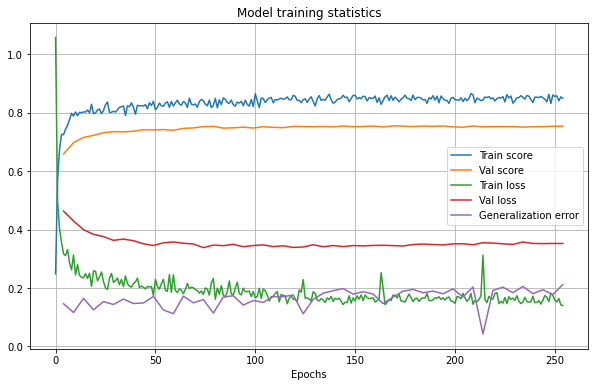

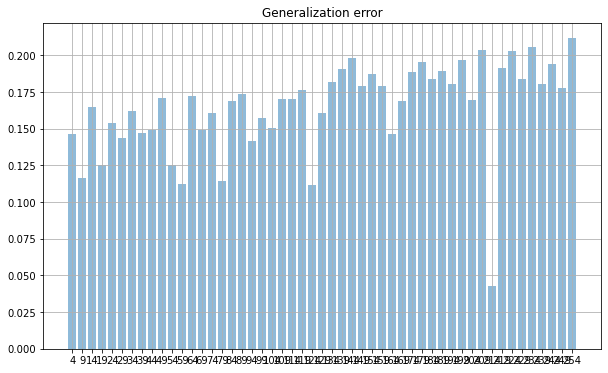

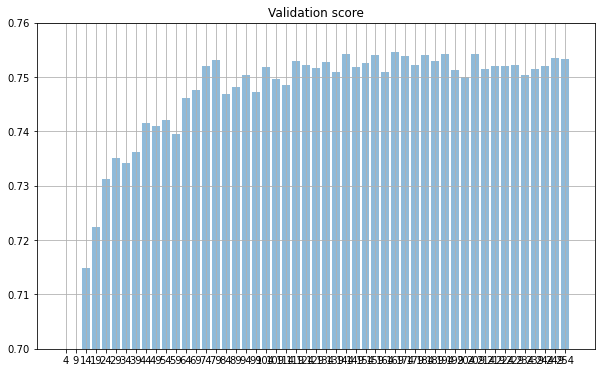

In [3]:
data = read_scores(file='mvfusion_3d_submission/batchsize6_nviews6_maxpoints200000.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.76])

#### Previously submitted model (M1)

M1


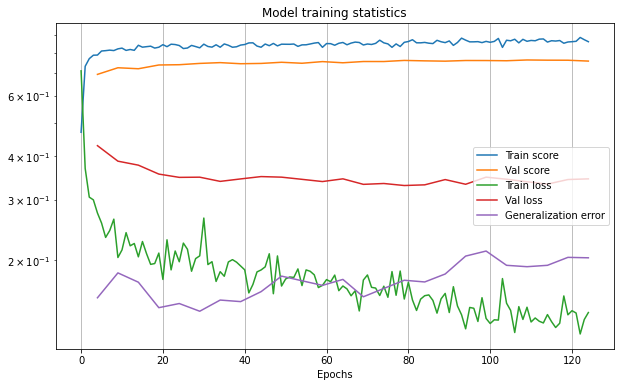

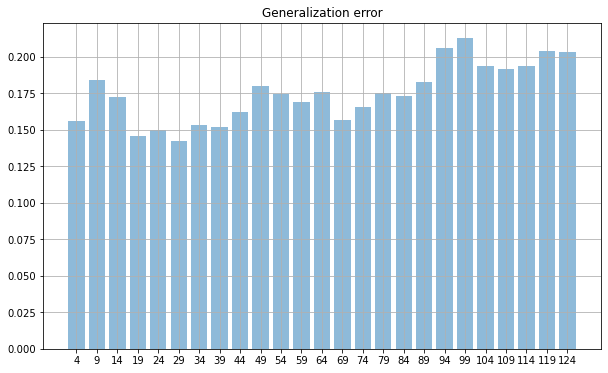

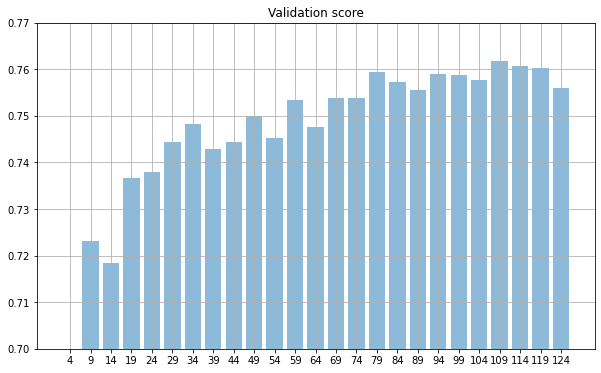

In [5]:
for i in range(1, 2):
    print(f"M{i}")
    data = read_scores(file=f'mvfusion_3d/model_comparison/M{i}.out')
    plot_graph(data, log_scale=True)

    # Generalization error
    val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
    gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
    plot_barchart(val_range, gen_error, 'Generalization error')
    plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])

# Superconvergence

### Part 1. LR range test (SGD with momentum, wd 1e-4)

In [6]:
# Looked good, take max_lr around 0.3 or lower

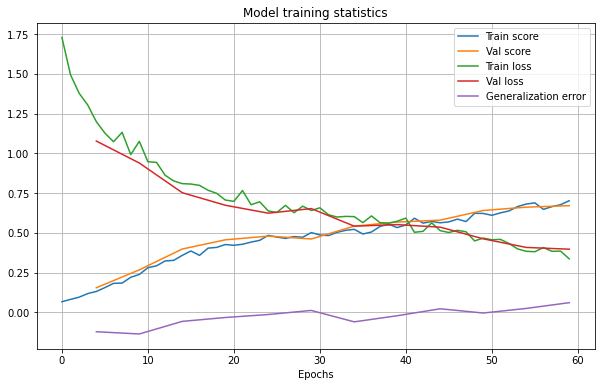

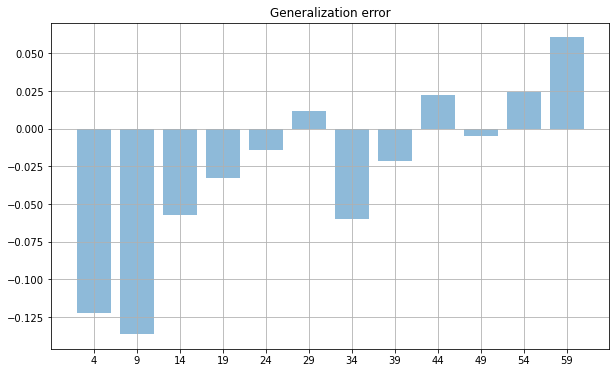

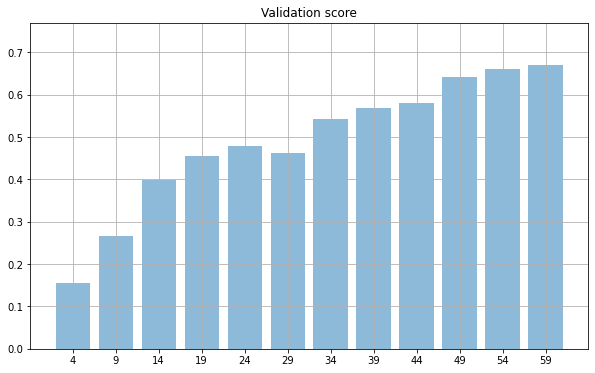

In [7]:
# 3D only
data = read_scores(file='superconvergence/3d_only/train_sgd_wd1e-4_lr0.3.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.0, 0.77])

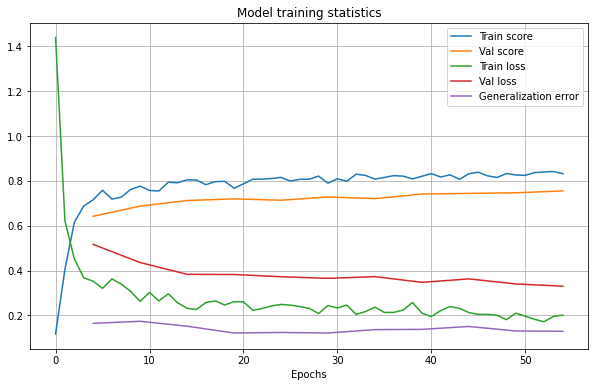

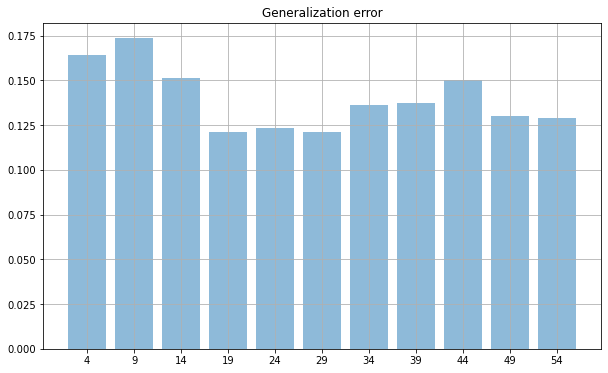

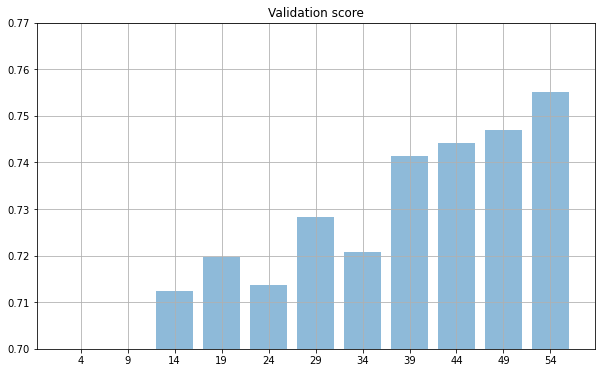

In [8]:
# MVFusion_3D_small

data = read_scores(file='superconvergence/train_sgd_wd1e-4_lr0.3.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])

# gradient flow: https://jupyter.lisa.surfsara.nl/2021/user/fsun/view/DeepViewAgg/outputs/2022-11-22/20-41-13/gradient_flow.png

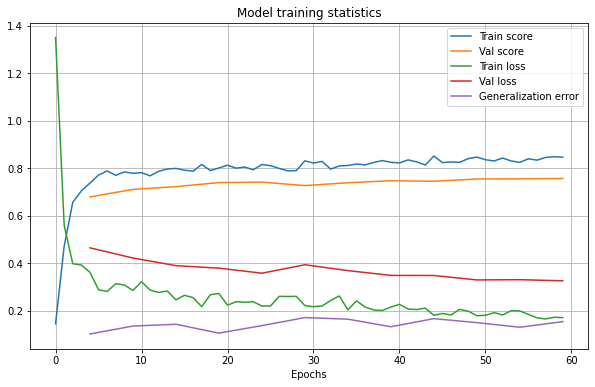

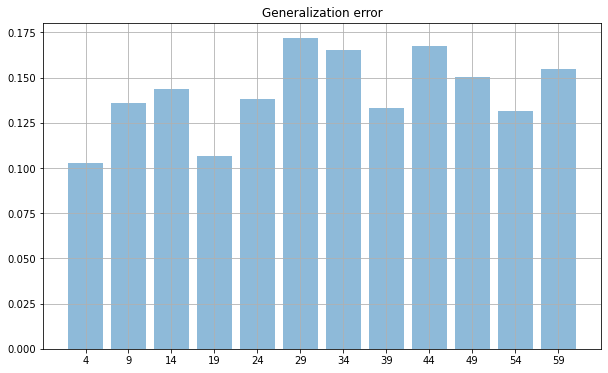

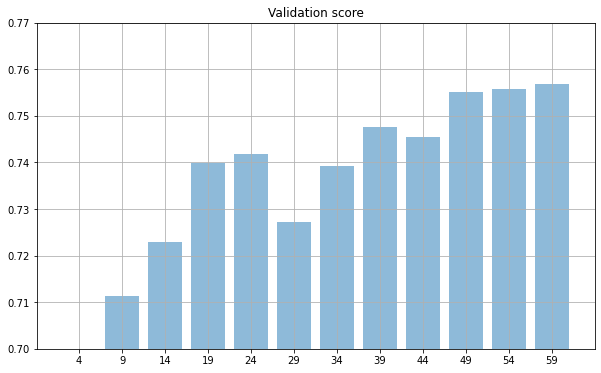

In [9]:
# MVFusion_3D_medium

data = read_scores(file='superconvergence/MVFusion_3D_medium/train_sgd_wd1e-4_lr0.3.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])

# gradient flow: https://jupyter.lisa.surfsara.nl/2021/user/fsun/view/DeepViewAgg/outputs/2022-11-22/20-41-13/gradient_flow.png

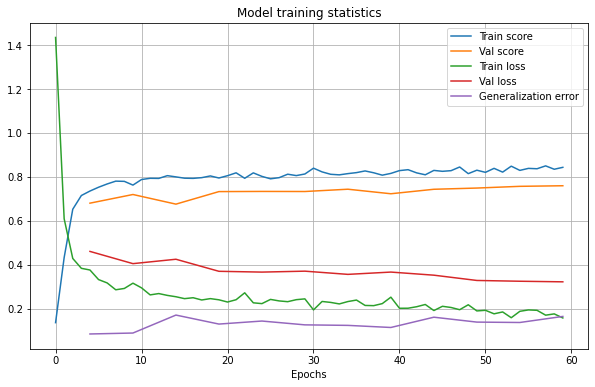

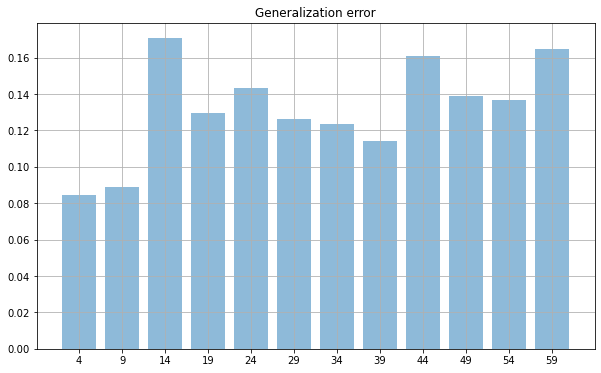

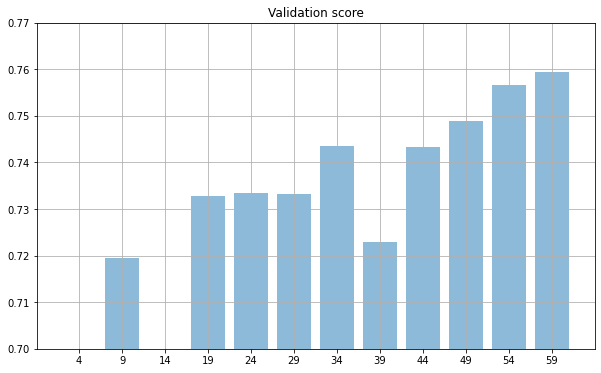

In [9]:
# MVFusion_3D_large

data = read_scores(file='superconvergence/MVFusion_3D_large/train_sgd_wd1e-4_lr0.3.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])

# gradient flow: https://jupyter.lisa.surfsara.nl/2021/user/fsun/view/DeepViewAgg/outputs/2022-11-22/20-41-13/gradient_flow.png

### Need to rerun gating with proper learning rate scheduler

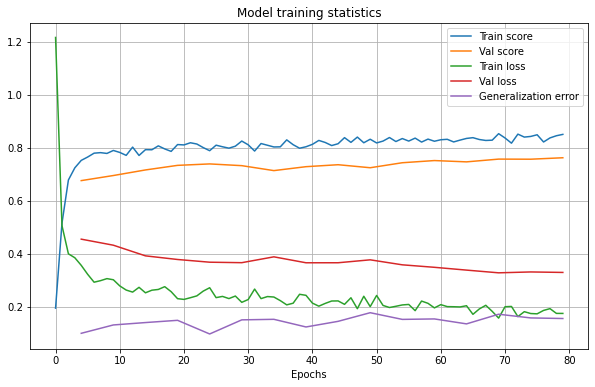

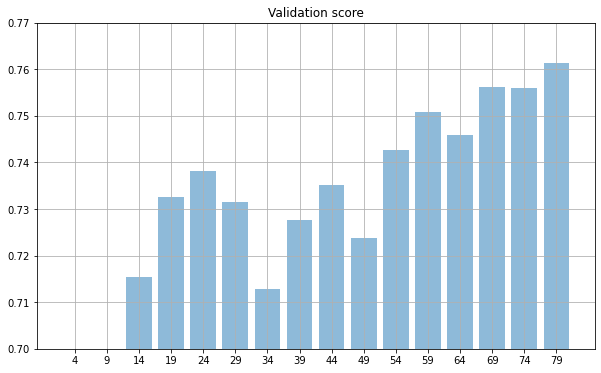

In [15]:
# MVFusion medium 80 epochs
data = read_scores(file='superconvergence/MVFusion_3D_medium/80_epochs_2nd_run.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
# plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])

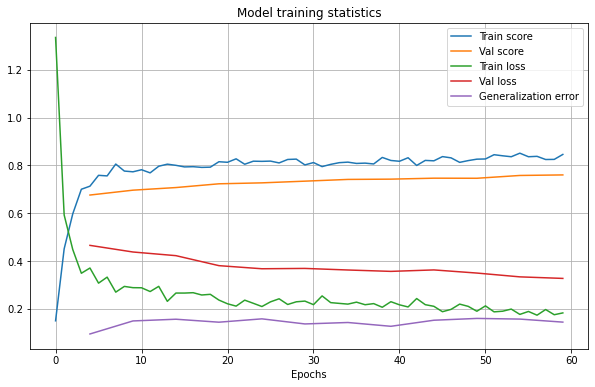

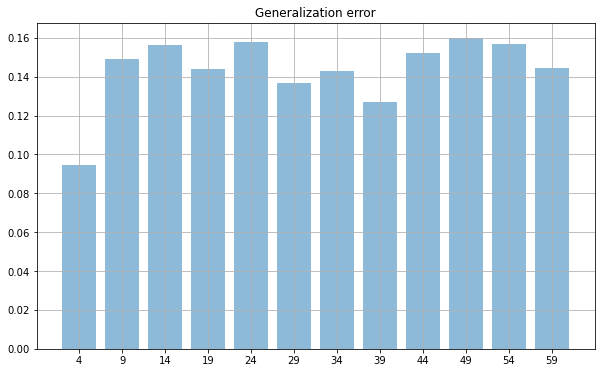

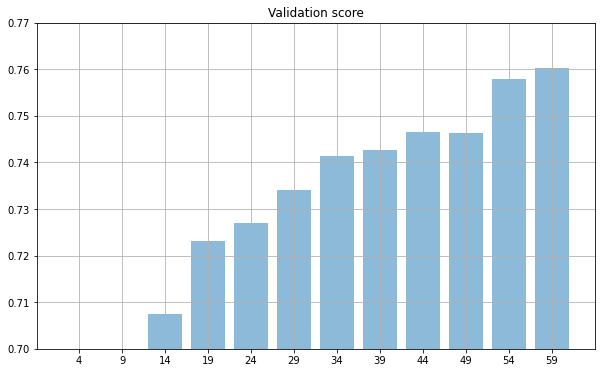

Max val score:  0.7602615828789723


In [45]:
# MVFusion 3D small default config
data = read_scores(file='superconvergence/MVFusion_3D_small/default_2nd_run.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])
print("Max val score: ", max(data['val_scores']))

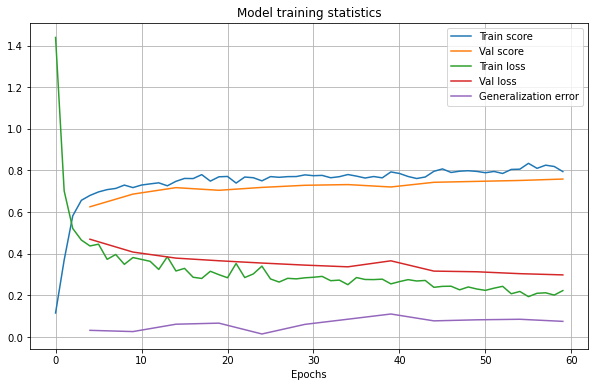

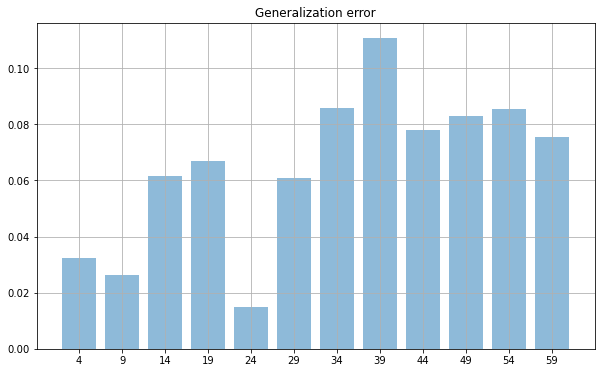

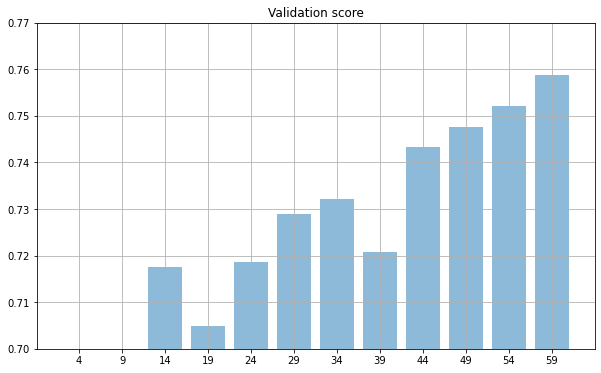

Max val score:  0.7588352236917505


In [46]:
# MVFusion 3D small, using swin_l_early masks
data = read_scores(file='superconvergence/MVFusion_3D_small/m2f_swin_l_early_2nd_run.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])
print("Max val score: ", max(data['val_scores']))

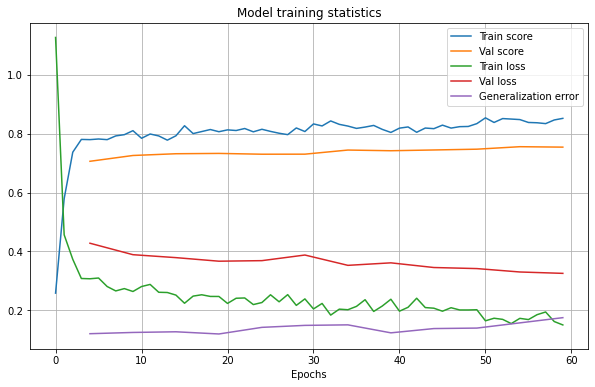

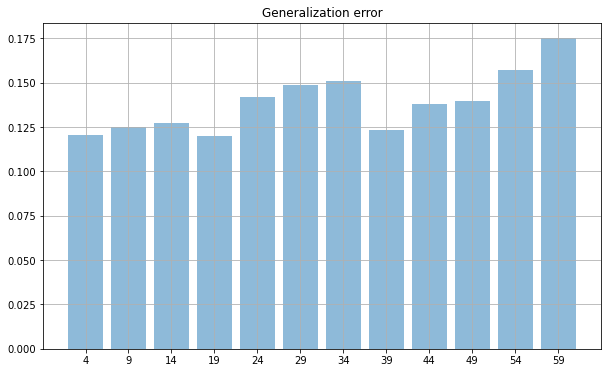

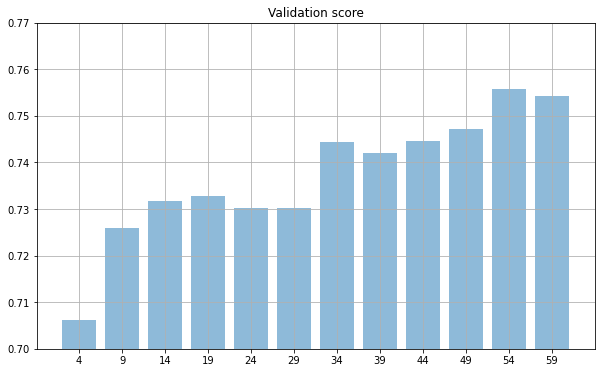

In [19]:
# MVAttention_3D_small
data = read_scores(file='superconvergence/MVAttention_3D_small/mvattention_baseline_2nd_run.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])

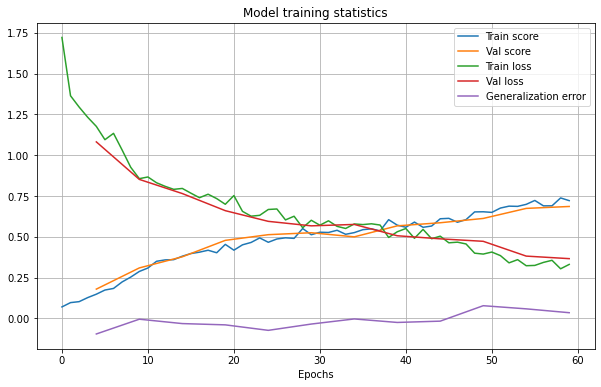

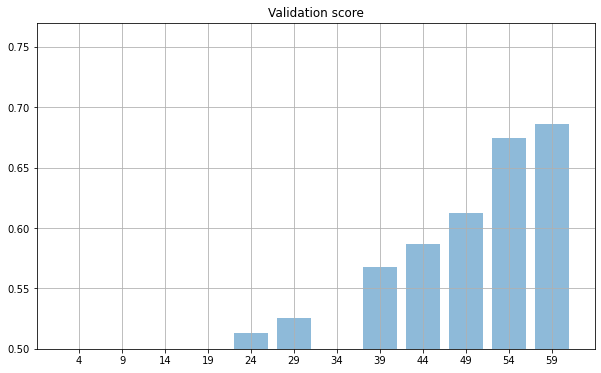

In [21]:
# MVFusion small no M2F
data = read_scores(file='superconvergence/MVFusion_3D_small/no_m2f_labels_2nd_run.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
# plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.5, 0.77])

# Gating vs no Gating (MVFusion_3D_medium)

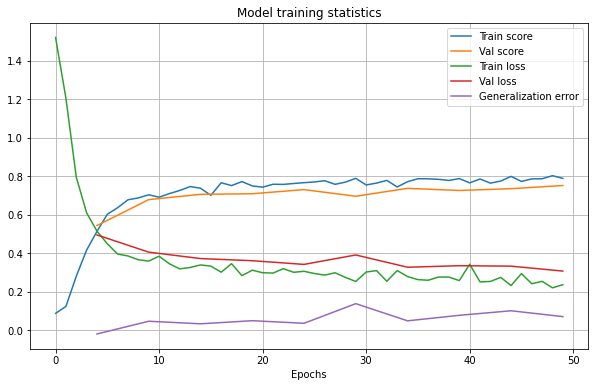

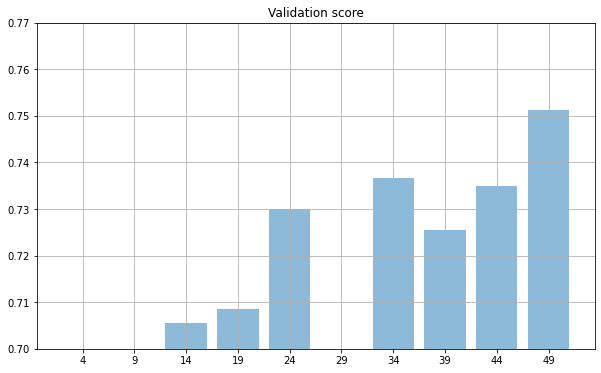

Max val score:  0.7513489086751477


In [16]:
# Gating
data = read_scores(file='superconvergence/MVFusion_3D_medium/gating_60epochs_swin_l_early.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
# plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])
print("Max val score: ", max(data['val_scores']))

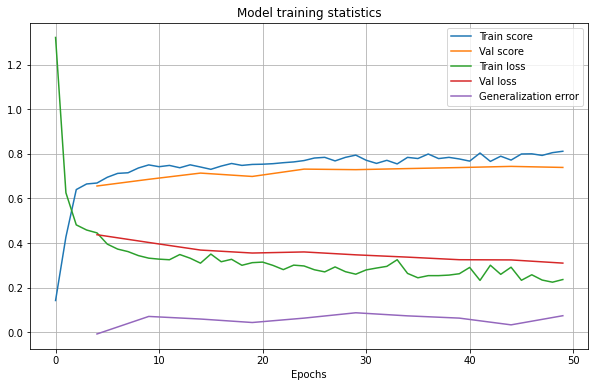

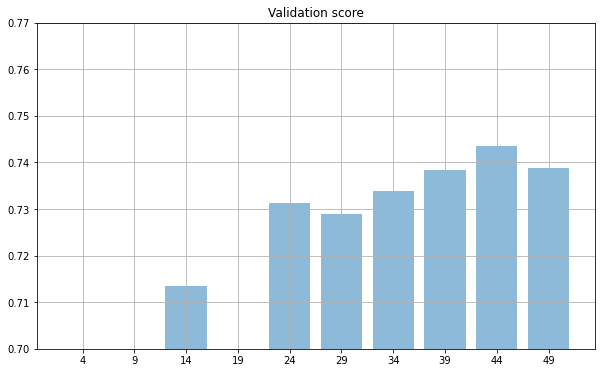

Max val score:  0.7435932764818276


In [15]:
# No gating
data = read_scores(file='superconvergence/MVFusion_3D_medium/60epochs_swin_l_early.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
# plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])
print("Max val score: ", max(data['val_scores']))

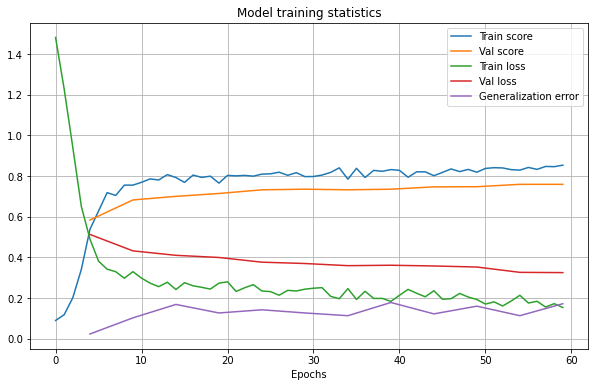

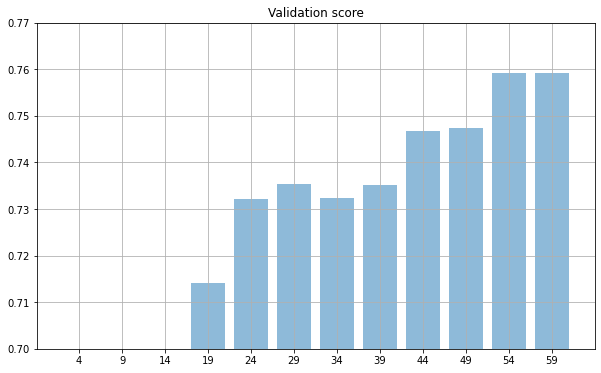

Max val score:  0.7591571912651617


In [11]:
# MVFusion_3D_small/60epochs_m2f_masks_gating.out

data = read_scores(file='superconvergence/MVFusion_3D_small/60epochs_m2f_masks_gating.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
# plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])
print("Max val score: ", max(data['val_scores']))

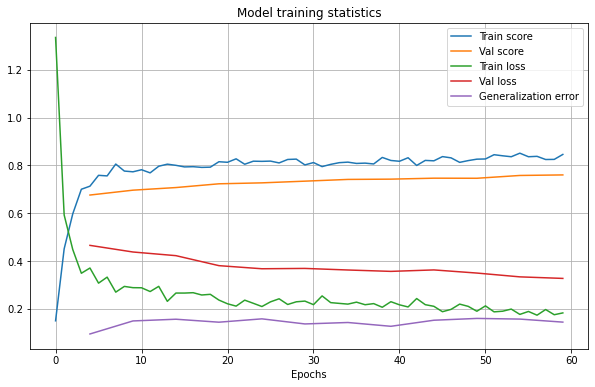

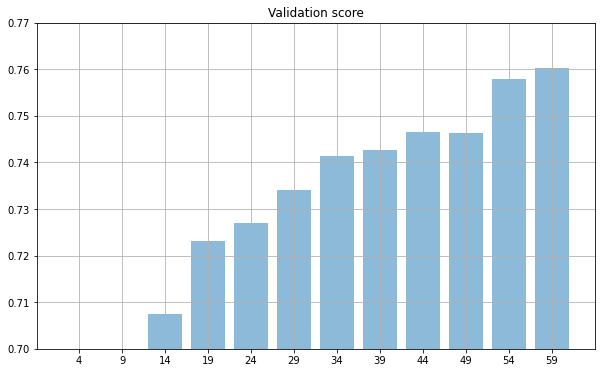

Max val score:  0.7602615828789723


In [14]:
# MVFusion_3D_small default 

data = read_scores(file='superconvergence/MVFusion_3D_small/default_2nd_run.out')
plot_graph(data, log_scale=False)

# Generalization error
val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
# plot_barchart(val_range, gen_error, 'Generalization error')
plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])
print("Max val score: ", max(data['val_scores']))

In [6]:
# The following models used: m2f_masks
MVFusion_3D_small = [
    'MVFusion_3D_small/default_2nd_run.out',
    'MVFusion_3D_small/default_3rd_run.out'

]

MVFusion_3D_small_gating = [
    'MVFusion_3D_small/60epochs_m2f_masks_gating.out',
    'MVFusion_3D_small/60epochs_m2f_masks_gating_2nd_run.out'
]

MVFusion_3D_small_no_m2f_labels = [
    'MVFusion_3D_small/no_m2f_labels_2nd_run.out'
]

MVFusion_3D_medium = [
    'MVFusion_3D_medium/80_epochs_2nd_run.out',
    'MVFusion_3D_medium/80_epochs_3rd_run.out',
]

MVFusion_3D_medium_gating = [
    'MVFusion_3D_medium/80_epochs_gating.out'
]

MVAttention_3D_small = [
    'MVAttention_3D_small/mvattention_baseline_2nd_run.out'
]

Res16UNet34 = [
    '3d_only/train_sgd_wd1e-4_lr0.3.out'
]

MVFusion_3D_small_6views = [
    'MVFusion_3D_small/6_views.out'
]

MVFusion_3D_small_6views_nodropout = [
    'MVFusion_3D_small/MVFusion_3D_small_6views_nodropout.out'
]



all_models = [MVFusion_3D_small, MVFusion_3D_small_gating, MVFusion_3D_medium,
              MVFusion_3D_medium_gating, MVAttention_3D_small, MVFusion_3D_small_no_m2f_labels, Res16UNet34, 
              MVFusion_3D_small_6views, MVFusion_3D_small_6views_nodropout]

In [7]:
def plot_graph_error(data, log_scale=False):
    if len(data['train_scores'].shape) == 1:
        plot_graph(data, log_scale=log_scale)
        return
    
    plt.figure(figsize=(10,6))
    
    # Train

    train_scores = data['train_scores'].mean(axis=0)
    train_scores_err = data['train_scores'].std(axis=0)
    
    train_losses = data['train_losses'].mean(axis=0)
    train_losses_err = data['train_losses'].std(axis=0)
    
    train_x = range(len(train_scores))

    plt.plot(train_x, train_scores, color=colormap[0], label=f'Train score')
    plt.plot(train_x, train_losses, color=colormap[1], label=f'Train loss')

    plt.fill_between(train_x, train_scores-train_scores_err, train_scores+train_scores_err, alpha=0.5)
    plt.fill_between(train_x, train_losses-train_losses_err, train_losses+train_losses_err, alpha=0.5)



    # Validation
    # Pad validation metrics at x=0
    val_scores = np.concatenate(([0], data['val_scores'].mean(axis=0)), axis=0)
    val_scores_err = np.concatenate(([0], data['val_scores'].std(axis=0)), axis=0)

    val_losses = np.concatenate(([train_losses[0]], data['val_losses'].mean(axis=0)), axis=0)
    val_losses_err = np.concatenate(([train_scores_err[0]], data['val_losses'].std(axis=0)), axis=0)
    
    val_x = list(range(4, (len(train_scores) - len(train_scores) % 5), 5))
    val_x = [0] + val_x

    plt.plot(val_x, val_scores, color=colormap[2], label=f'Val score')
    plt.plot(val_x, val_losses, color=colormap[3], label=f'Val loss')

    plt.fill_between(val_x, val_scores-val_scores_err, val_scores+val_scores_err, alpha=0.5)
    plt.fill_between(val_x, val_losses-val_losses_err, val_losses+val_losses_err, alpha=0.5)

    

    # Plot generalization error
    gen_error = np.array(val_losses) - np.array([train_losses[i] for i in val_x])
    plt.plot(val_x, gen_error, color=colormap[4], label=f'Generalization error')


    
    
    plt.legend()
    plt.title('Model training statistics')
    plt.xlabel('Epochs')
    ax = plt.gca()
    if log_scale:
        ax.set_yscale('log')
    # ax.set_xlim([xmin, xmax])
    # ax.set_ylim([0.6, 0.9])
    plt.grid()

    plt.show()

Number of runs:  2
MVFusion_3D_small/default_3rd_run.out


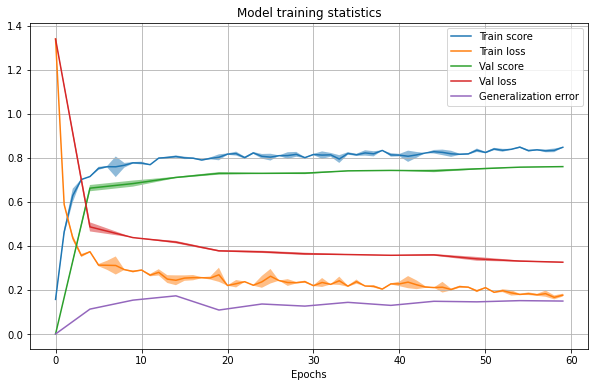

Max val score:  0.7602615828789723
[0.76026158 0.75895575]


In [9]:
i = 0
datas = []
print("Number of runs: ", len(all_models[i]))
for fname in all_models[i]:
    datas.append(read_scores(file='superconvergence/' + fname))
    
final_dict = {}
for data in datas:
    for k, v in data.items():
        if k not in final_dict:
            final_dict[k] = np.array(v)
        else:
            final_dict[k] = np.vstack((final_dict[k], v))
                
print(fname)
plot_graph_error(final_dict, log_scale=False)

#     # Generalization error
#     val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
#     gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
#     # plot_barchart(val_range, gen_error, 'Generalization error')
#     plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])
print("Max val score: ", np.max(final_dict['val_scores']))
print(final_dict['val_scores'][:, -1])

In [10]:
benchmark_models = [
    ['MVFusion_3D_small_6views_50epochs.out'],
    ['MVFusion_3D_small_6views_60epochs.out']
]

Number of runs:  1
MVFusion_3D_small_6views_50epochs.out


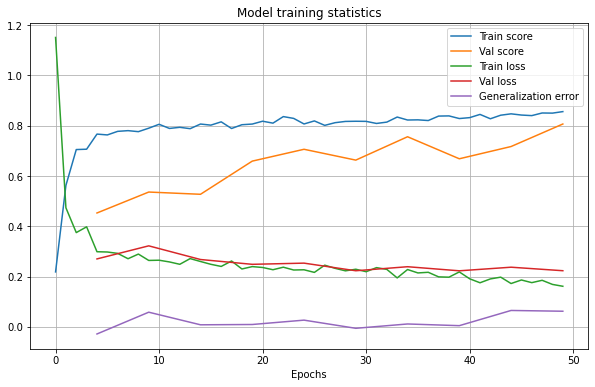

Max train score:  0.8561430637323306
Last train loss:  0.16119346079918054
Number of runs:  1
MVFusion_3D_small_6views_60epochs.out


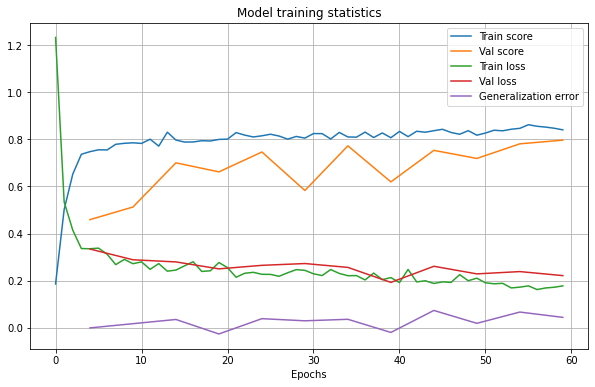

Max train score:  0.8623338918716521
Last train loss:  0.17745549260423732


In [15]:
for i in range(len(benchmark_models)):
    datas = []
    print("Number of runs: ", len(benchmark_models[i]))
    for fname in benchmark_models[i]:
        datas.append(read_scores(file='benchmark/' + fname))

    final_dict = {}
    for data in datas:
        for k, v in data.items():
            if k not in final_dict:
                final_dict[k] = np.array(v)
            else:
                final_dict[k] = np.vstack((final_dict[k], v))

    print(fname)
    plot_graph_error(final_dict, log_scale=False)

    #     # Generalization error
    #     val_range = range(4, len(data['train_losses']) - len(data['train_losses']) % 5, 5)
    #     gen_error = np.array(data['val_losses']) - np.array([data['train_losses'][i] for i in val_range])
    #     # plot_barchart(val_range, gen_error, 'Generalization error')
    #     plot_barchart(val_range, data['val_scores'], 'Validation score', ylim=[0.7, 0.77])
    print("Max train score: ", np.max(final_dict['train_scores']))
    print("Last train loss: ", final_dict['train_losses'][-1])
#     print(final_dict['train_scores'][:, -1])